Text(0.5, 1.0, 'Linear Kernel (train)')

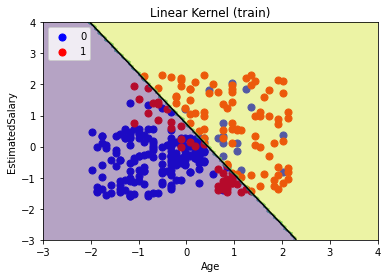

In [7]:
# Support Vector Machine (SVM)

# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Dataset
dataset = pd.read_csv('D:\Personal\Maestria BigData\Módulo 7. Data mining, machine learning y deep learning\Datos\Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

######### Linear Kernel

# Entrenamiento del modelo - Kernel Linear
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

##### Visualization
# Conversion a series y definir los valores de target
y_training = pd.Series(y_train)
X_training = X_train
target_names=['0','1']

# Definir los limites de la visualziacion
lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

# Indices de los labels
idxPlus=y_training[y_training==0].index
idxMin=y_training[y_training==1].index

# Representacion de los valores de cada clase con un color distinto b/r
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j] # meshgrid; matriz de 100x100 con las divisiones entre los limites definidos
Z = classifier.decision_function(np.c_[X.ravel(),Y.ravel()]) # Dibujo de la frontera de decision para esos puntos del meshgrid
Z = Z.reshape(X.shape) # Se define la frontera como otro meshgrid de 100x100
plt.contourf(X,Y,Z > 0,alpha=0.4) # Dibujo del contorno
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.title('Linear Kernel (train)')

# Algunos de los puntos no consiguen clasificarse bien. 
# El siguiente paso sería intentar mejorar el modelo utilizando 
#un kernel que permita obtener una frontera de decisión no lineal.

In [4]:
# Entrenamiento del modelo - Kernel RBF
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

Text(0.5, 1.0, 'RBF Kernel')

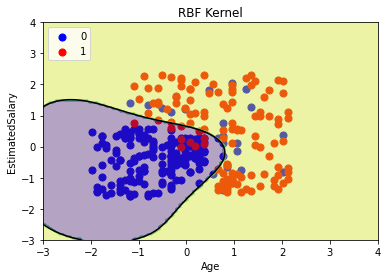

In [6]:
# Conversion a series y definir los valores de target
y_training = pd.Series(y_train)
X_training = X_train
target_names=['0','1']

# Definir los limites de la visualziacion
lbX1=math.floor(min(X_training[:,0]))-1
ubX1=math.ceil(max(X_training[:,0]))+1
lbX2=math.floor(min(X_training[:,1]))-1
ubX2=math.ceil(max(X_training[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

# Indices de los labels
idxPlus=y_training[y_training==0].index
idxMin=y_training[y_training==1].index

# Representacion de los valores de cada clase con un color distinto b/r
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)


X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = classifier.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.title('RBF Kernel')
# la frontera RBF mejora el poder de clasificación del modelo